<a href="https://colab.research.google.com/github/shivammahajan03/asset_analysis/blob/main/Financial_Analytics_Asset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Step 1: Read the CSV file into a DataFrame
file_path = '/content/Financial Analytics Assignment 1 - Returns Data.csv'
df = pd.read_csv(file_path)

# Step 2: Convert the DataFrame to the desired dictionary format
returns_data = {
    'DATE': df['Date'].tolist(),
    'INFY': df['Return - INFY'].tolist(),
    'IRCTC': df['Return - IRCTC'].tolist(),
    'TATAELXSI': df['Return - TATAELXSI'].tolist()
}

# Step 3: Print the result to verify
print(returns_data)


{'DATE': ['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-19', '2021-07-20', '2021-07-22', '2021-07-23', '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30', '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-20', '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-0

In [5]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

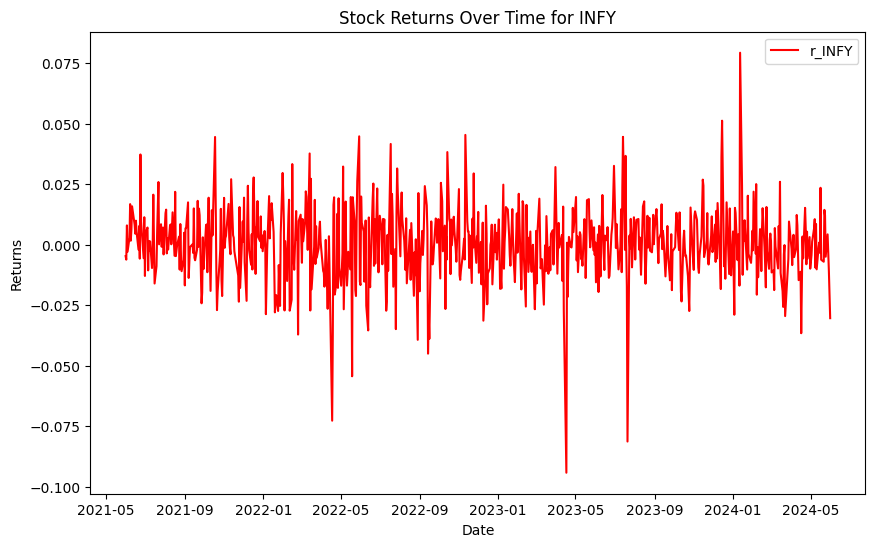

In [6]:
# Plot the time series data for INFY
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Return - INFY'], label='r_INFY', color = 'red')

# Add title and labels
plt.title('Stock Returns Over Time for INFY')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

# Show the plot
plt.show()

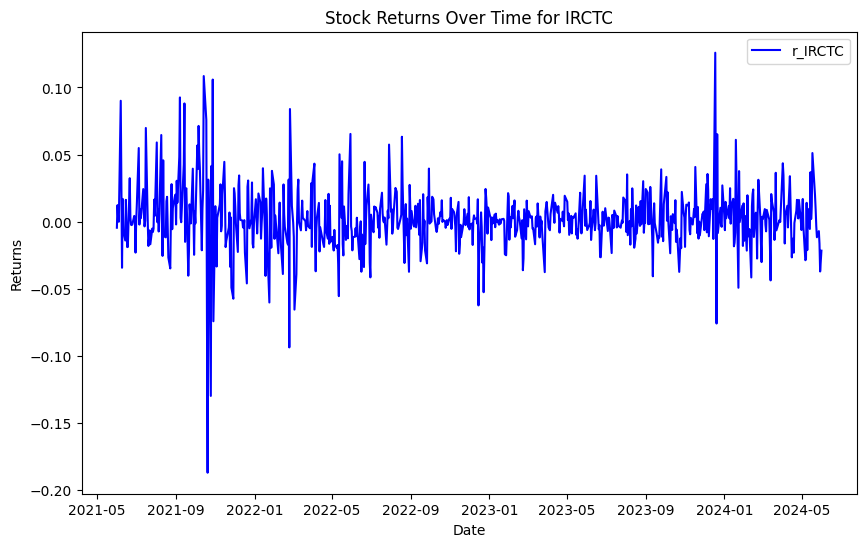

In [7]:
# Plot the time series data for IRCTC
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Return - IRCTC'], label='r_IRCTC', color = 'blue')

# Add title and labels
plt.title('Stock Returns Over Time for IRCTC')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

# Show the plot
plt.show()

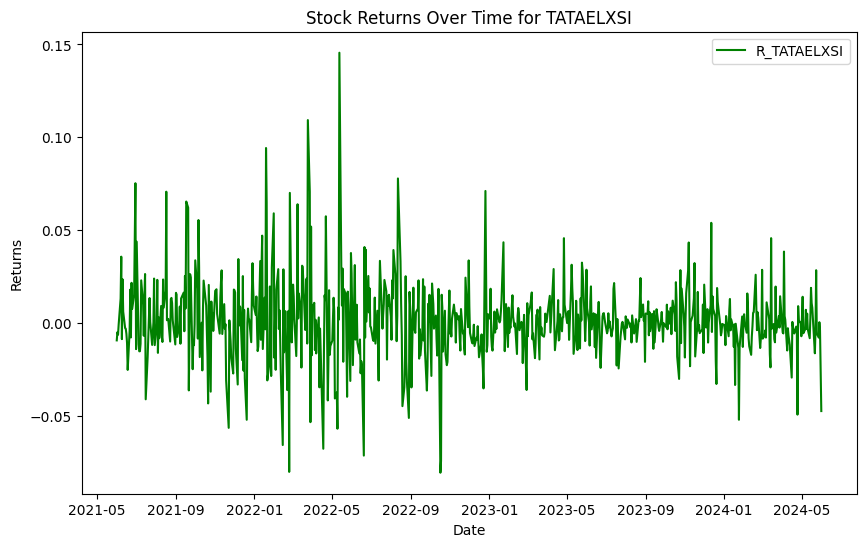

In [8]:
# Plot the time series data for TATAELXSI
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Return - TATAELXSI'], label='R_TATAELXSI', color = 'green')

# Add title and labels
plt.title('Stock Returns Over Time for TATAELXSI')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

# Show the plot
plt.show()

In [9]:
df.rename(columns={'Date': 'Date', 'Return - INFY': 'INFY', 'Return - IRCTC': 'IRCTC', 'Return - TATAELXSI': 'TATAELXSI'}, inplace=True)

# Mean
mean_infy = df['INFY'].mean()
mean_irctc = df['IRCTC'].mean()
mean_tataelxsi = df['TATAELXSI'].mean()

# Median
median_infy = df['INFY'].median()
median_irctc = df['IRCTC'].median()
median_tataelxsi = df['TATAELXSI'].median()

# Range
data_range_infy = df['INFY'].max() - df['INFY'].min()
data_range_irctc = df['IRCTC'].max() - df['IRCTC'].min()
data_range_tataelxsi = df['TATAELXSI'].max() - df['TATAELXSI'].min()

# Variance
variance_infy = df['INFY'].var()
variance_irctc = df['IRCTC'].var()
variance_tataelxsi = df['TATAELXSI'].var()

# Standard Deviation
std_dev_infy = df['INFY'].std()
std_dev_irctc = df['IRCTC'].std()
std_dev_tataelxsi = df['TATAELXSI'].std()

# Skewness
skewness_infy = df['INFY'].skew()
skewness_irctc = df['IRCTC'].skew()
skewness_tataelxsi = df['TATAELXSI'].skew()

# Storing the above in an Analysis table
analysis_table = pd.DataFrame({
    'Stock': ['INFY', 'IRCTC', 'TATAELXSI'],
    'Mean': [mean_infy, mean_irctc, mean_tataelxsi],
    'Median': [median_infy, median_irctc, median_tataelxsi],
    'Range': [data_range_infy, data_range_irctc, data_range_tataelxsi],
    'Variance': [variance_infy, variance_irctc, variance_tataelxsi],
    'Standard Deviation': [std_dev_infy, std_dev_irctc, std_dev_tataelxsi],
    'Skewness': [skewness_infy, skewness_irctc, skewness_tataelxsi]
})

# Print the DataFrame
print(analysis_table)

       Stock      Mean    Median     Range  Variance  Standard Deviation  \
0       INFY  0.000129  0.000157  0.173567  0.000233            0.015257   
1      IRCTC  0.001613  0.000766  0.312970  0.000560            0.023668   
2  TATAELXSI  0.001094 -0.000061  0.226217  0.000452            0.021258   

   Skewness  
0 -0.408911  
1 -0.271766  
2  0.755988  


               INFY     IRCTC  TATAELXSI
INFY       1.000000  0.209305   0.234829
IRCTC      0.209305  1.000000   0.279310
TATAELXSI  0.234829  0.279310   1.000000


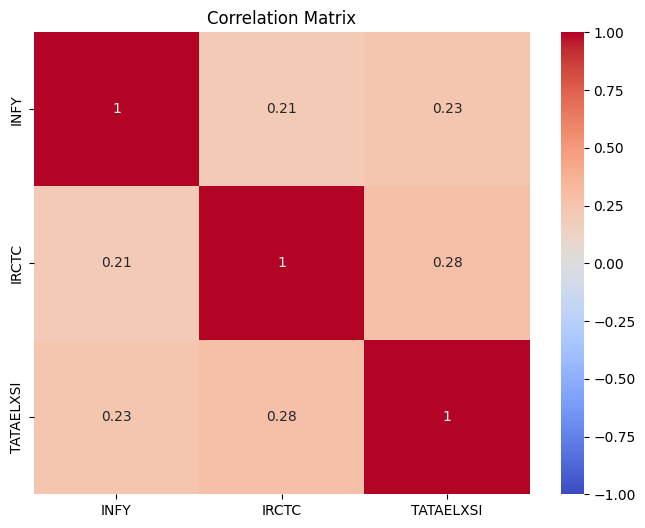

In [10]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix
print(correlation_matrix)

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Step 1: Create a DataFrame from the necessary columns
returns_df = df[['INFY', 'IRCTC', 'TATAELXSI']]

# Step 2: Calculate expected returns (mean)
expected_returns = returns_df.mean()

# Step 3: Calculate the covariance matrix
cov_matrix = returns_df.cov()

# Print the results to verify
print("Expected Returns:")
print(expected_returns)
print("\nCovariance Matrix:")
print(cov_matrix)


Expected Returns:
INFY         0.000129
IRCTC        0.001613
TATAELXSI    0.001094
dtype: float64

Covariance Matrix:
               INFY     IRCTC  TATAELXSI
INFY       0.000233  0.000076   0.000076
IRCTC      0.000076  0.000560   0.000141
TATAELXSI  0.000076  0.000141   0.000452


In [12]:
# Define the optimization function
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_returns, p_std = portfolio_performance(weights, mean_returns, cov_matrix)
    return - (p_returns - risk_free_rate) / p_std

def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Risk-free rate (assumed to be 0 for simplicity)
risk_free_rate = 0

# Optimize the portfolio
opt_results = optimize_portfolio(expected_returns, cov_matrix, risk_free_rate)

# Display the results
opt_weights = opt_results.x
print(f'Optimal Weights: {opt_weights}')
print(f'Expected Portfolio Return: {portfolio_performance(opt_weights, expected_returns, cov_matrix)[0]}')
print(f'Portfolio Risk (Standard Deviation): {portfolio_performance(opt_weights, expected_returns, cov_matrix)[1]}')


Optimal Weights: [0.         0.59816637 0.40183363]
Expected Portfolio Return: 0.0014045513890281426
Portfolio Risk (Standard Deviation): 0.01846503549749894
